In [1]:
import warnings
warnings.filterwarnings('ignore')

import sys
sys.path.insert(1, 'D:/kaneshi')
import kaneshi

from kaneshi.ml.dataset import Dataset
from kaneshi.ml.model import Model
from kaneshi.ml.nn_models import CNN1D

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import regularizers, layers
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)

    except RuntimeError as e:
        print(e)

In [3]:
ds_fn = '14_45_55_0.01_ohlc'

In [4]:
ds = Dataset.from_fn(ds_fn=ds_fn)

In [5]:
ds = ds.split().make_equal().normalize_each()

In [6]:
ds.show_info()

train (2996, 100, 4)
val (430, 100, 4)
test (294, 100, 4)


In [7]:
lookback = 100
optimizer = keras.optimizers.Adam(learning_rate=0.001)
loss = keras.losses.BinaryCrossentropy(name='binary_crossentropy')
metrics = ['accuracy']


cnn = CNN1D(input_shape=((lookback, ds.dataset['x_train'].shape[-1])),
                optimizer=optimizer,
                loss=loss,
                metrics=metrics)
cnn.build(n_layers=5, n_filters=16, kernel_size=20, num_last_neurons=1, activation='sigmoid')
model = cnn.compile()

In [8]:
model = Model(dataset=ds.dataset,
              model=model,
              
              callbacks=[],
              optimizer=optimizer,
              loss=loss,
              metrics=metrics)

In [9]:
model.fit(epoch=100, batch_size=500)

Epoch 1/100
6/6 [==============================] - 4s 64ms/step - loss: 0.7157 - accuracy: 0.5020 - val_loss: 0.7018 - val_accuracy: 0.5000
Epoch 2/100
6/6 [==============================] - 0s 13ms/step - loss: 0.6950 - accuracy: 0.5190 - val_loss: 0.6950 - val_accuracy: 0.5000
Epoch 3/100
6/6 [==============================] - 0s 14ms/step - loss: 0.6818 - accuracy: 0.5564 - val_loss: 0.6926 - val_accuracy: 0.5047
Epoch 4/100
6/6 [==============================] - 0s 13ms/step - loss: 0.6755 - accuracy: 0.5761 - val_loss: 0.6922 - val_accuracy: 0.5000
Epoch 5/100
6/6 [==============================] - 0s 13ms/step - loss: 0.6693 - accuracy: 0.5771 - val_loss: 0.6956 - val_accuracy: 0.5000
Epoch 6/100
6/6 [==============================] - 0s 14ms/step - loss: 0.6629 - accuracy: 0.6021 - val_loss: 0.6964 - val_accuracy: 0.5000
Epoch 7/100
6/6 [==============================] - 0s 14ms/step - loss: 0.6559 - accuracy: 0.6148 - val_loss: 0.6956 - val_accuracy: 0.5000
Epoch 8/100
6/6 [===

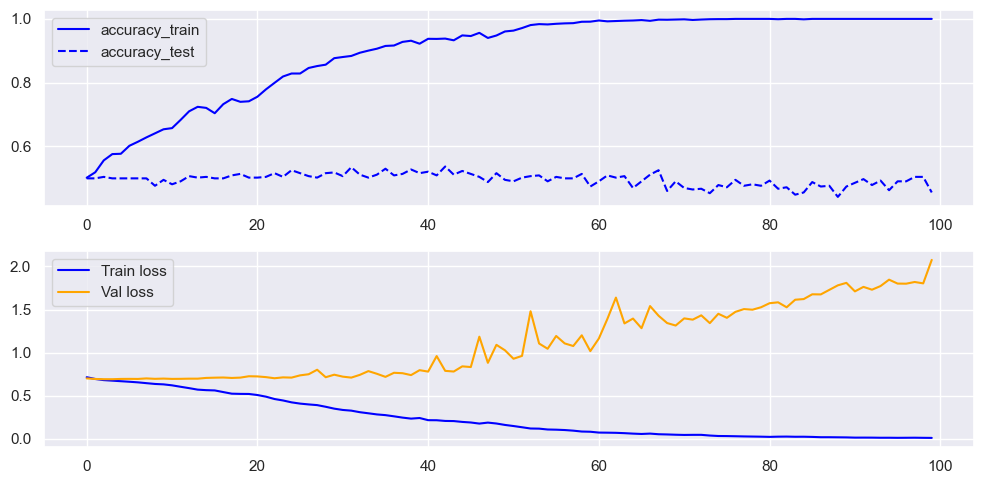

In [10]:
model.plot_history()

In [11]:
model.evaluate()

{'train': [0.09782185405492783, 0.9636181592941284],
 'val': [2.075855016708374, 0.4558139443397522],
 'test': [1.4870308637619019, 0.5714285969734192]}

10/10 [==============================] - 0s 2ms/step
Accuracy 0.5
Recall  0.0
Precision  0.0
F1  0.0


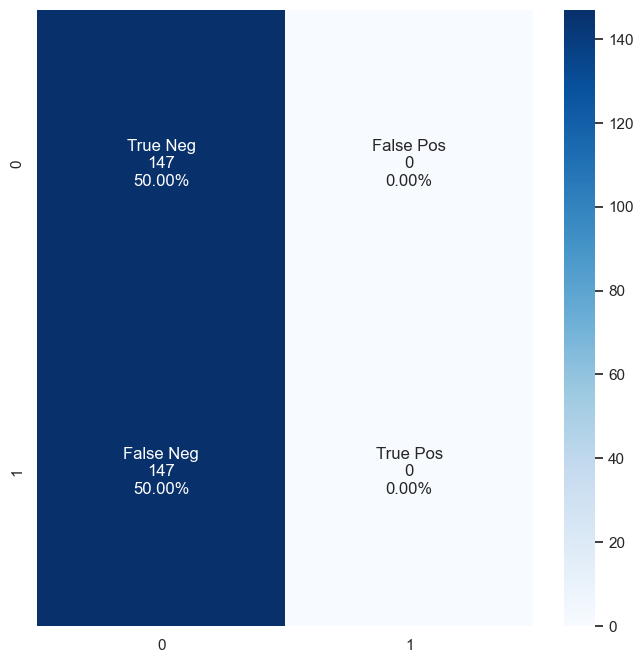

In [12]:
model.show_confusion()

10/10 [==============================] - 0s 2ms/step
No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.614


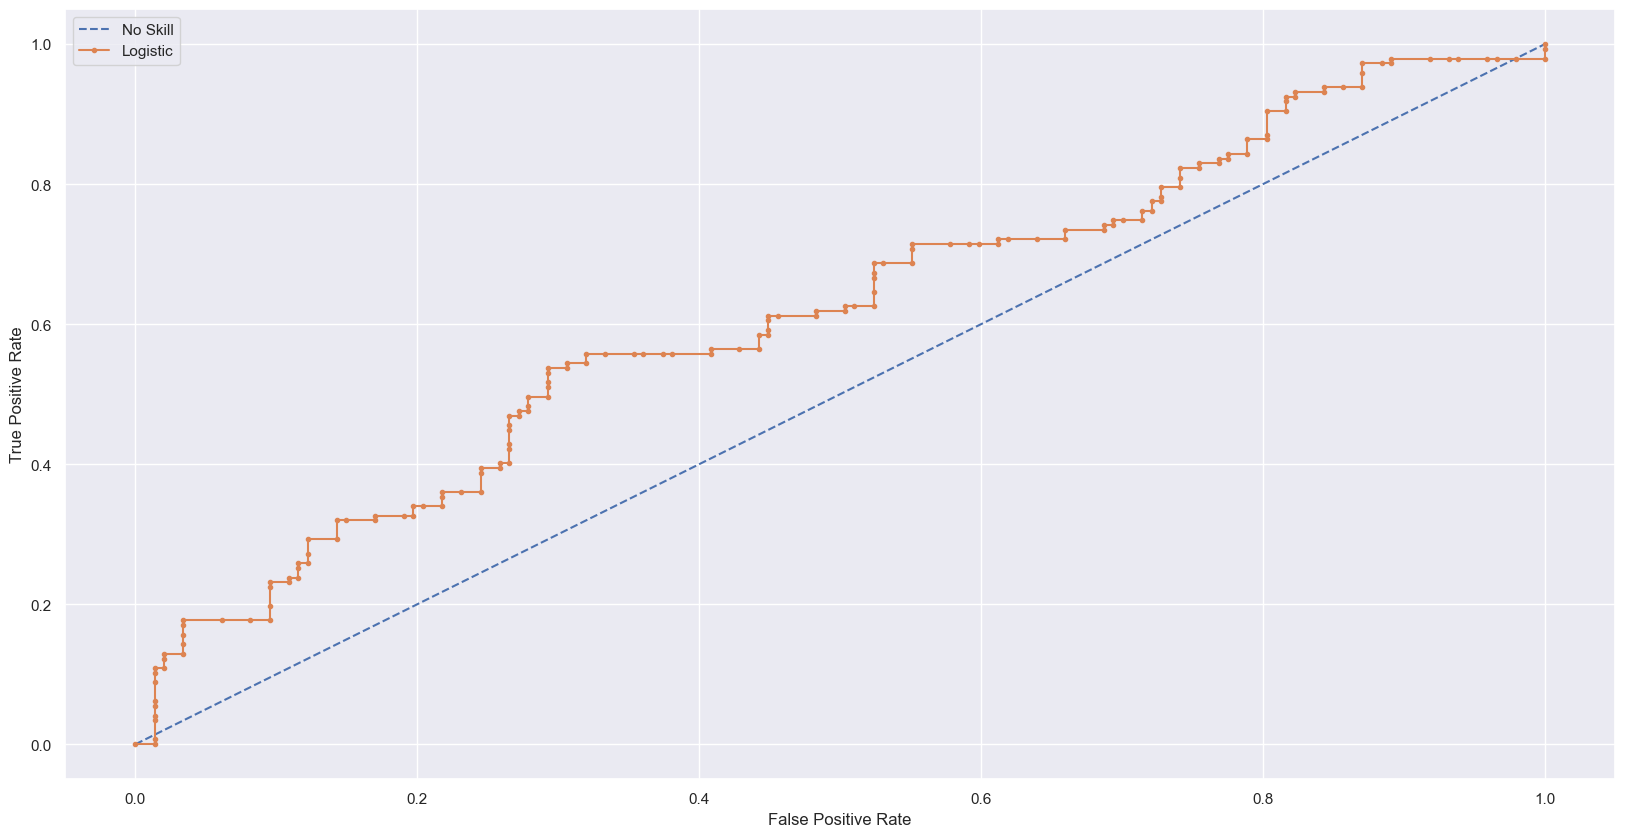

In [13]:
model.plot_roc_auc()